### Name : Aakanksha Kavishwar Bhadsale.
### Roll No : DS24MS04
### Project : InspireDirect Email Campaign Effectiveness Prediction

### Problem Statement :
The objective of this project is to build and evaluate multiple machine learning models to predict the success of an email campaign based on various email features.

In [1]:
# Add required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Add a csv File
df = pd.read_csv('https://raw.githubusercontent.com/BhadsaleA/ML_Projects/refs/heads/main/data_email_campaign.csv')
df.head(20)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


In [3]:
#Shape of the dataset
df.shape

(68353, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [5]:
df[['Total_Past_Communications','Total_Links','Total_Images']]

,Total_Past_Communications,Total_Links,Total_Images
0,33.0,8.0,0.0
1,15.0,5.0,0.0
2,36.0,5.0,0.0
3,25.0,16.0,0.0
4,18.0,4.0,0.0
...,...,...,...
68348,22.0,16.0,13.0
68349,40.0,31.0,16.0
68350,33.0,9.0,0.0
68351,50.0,14.0,4.0


In [6]:
#find Cataegories(uniques Values)
df['Email_Status'].unique()

array([0, 1, 2])

In [7]:
df['Time_Email_sent_Category'].value_counts()

,count
Time_Email_sent_Category,
2,41129
1,13636
3,13588


In [8]:
df['Email_Campaign_Type'].value_counts()

,count
Email_Campaign_Type,
2,48273
3,19344
1,736


In [9]:
df['Email_Source_Type'].value_counts()

,count
Email_Source_Type,
1,37149
2,31204


In [10]:
df['Email_Type'].value_counts()

,count
Email_Type,
1,48866
2,19487


In [11]:
df['Word_Count'].value_counts()

,count
Word_Count,
694,1352
366,1063
988,919
678,896
577,885
...,...
1315,42
146,39
967,24


In [12]:
#Change Data Type of Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Email_Status columns to object
Col_name = ['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Email_Status']

for i in df[Col_name]:
    df[i] = df[i].astype('object')

In [13]:
#After changing data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  object 
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  object 
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  object 
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  object 
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 6.3+ MB


In [14]:
# Check null values
df.isnull().sum()

,0
Email_ID,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Customer_Location,11595
Email_Campaign_Type,0
Total_Past_Communications,6825
Time_Email_sent_Category,0
Word_Count,0
Total_Links,2201


 **Total_Past_Communications,Total_link,Total_Images Columns have NUll Values**

In [15]:
#Remove the 'Customer_Location' Column
df = df.drop('Customer_Location', axis=1)

**Remove the 'Customer_Location' column because it contains a significant number of null values (11595 out of 68353 total records) so..., there is no sense to fill null values.**

In [16]:
# Remove the null values
df = df.dropna()

**The columns Total_Past_Communications, Total_Links, and Total_Images contained a relatively small number of null values.removing null values from the three specified columns was chosen to maintain data integrity, preserve dataset size, and avoid unnecessary complexity in data handling. **

In [17]:
#After removing null values
df.isnull().sum()

,0
Email_ID,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Email_Campaign_Type,0
Total_Past_Communications,0
Time_Email_sent_Category,0
Word_Count,0
Total_Links,0
Total_Images,0


In [18]:
#Check duplicate records
df.duplicated().sum()

np.int64(0)

**No duplicate records are present**

In [19]:
#Count of uniques values present in the columns
df.nunique()

,0
Email_ID,58091
Email_Type,2
Subject_Hotness_Score,51
Email_Source_Type,2
Email_Campaign_Type,3
Total_Past_Communications,64
Time_Email_sent_Category,3
Word_Count,151
Total_Links,37
Total_Images,44


## Exploratory data analysis

####1. Univariate analysis

Univariate analysis is the process of examining one variable at a time to understand its distribution, patterns, and characteristics.



In [20]:
df['Email_Type'].value_counts()

,count
Email_Type,
1,41586
2,16505


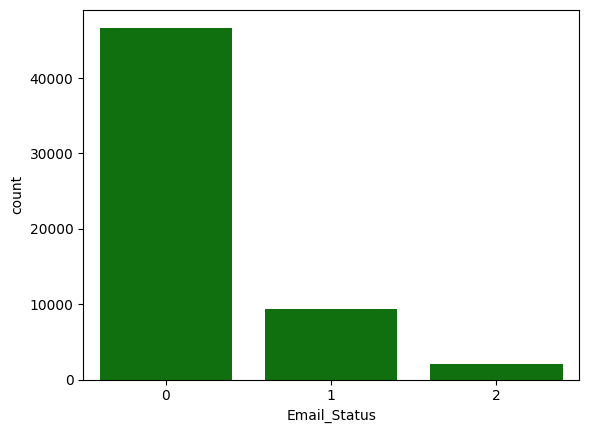

In [21]:
sns.countplot(data = df,x ='Email_Status',color = 'green')
plt.show()

**This graph shows the number of emails that were ignored, read, or acknowledged.**

####2.Bivariate analysis
Bivariate analysis is a type of analysis that examines the relationship between two variables. The goal is to see whether and how the variables are related.

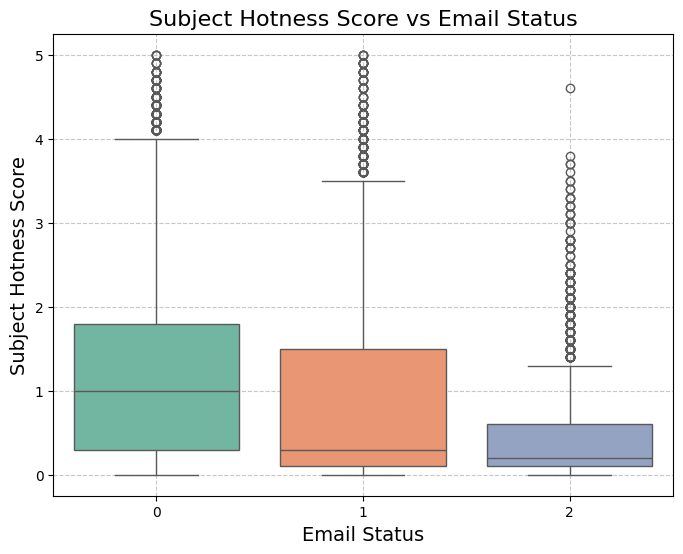

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Email_Status', y='Subject_Hotness_Score', data=df, palette='Set2')
plt.title('Subject Hotness Score vs Email Status', fontsize=16)
plt.xlabel('Email Status', fontsize=14)
plt.ylabel('Subject Hotness Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Subject Hotness Score alone is not a strong predictor of email success.
Emails with moderate to low scores sometimes perform better, suggesting the need for balanced and targeted subject lines.**

####3.Multivariate analysis

Multivariate analysis is a technique used to understand relationships between three or more variables at the same time.

In [52]:
#Select only numeric datatype
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

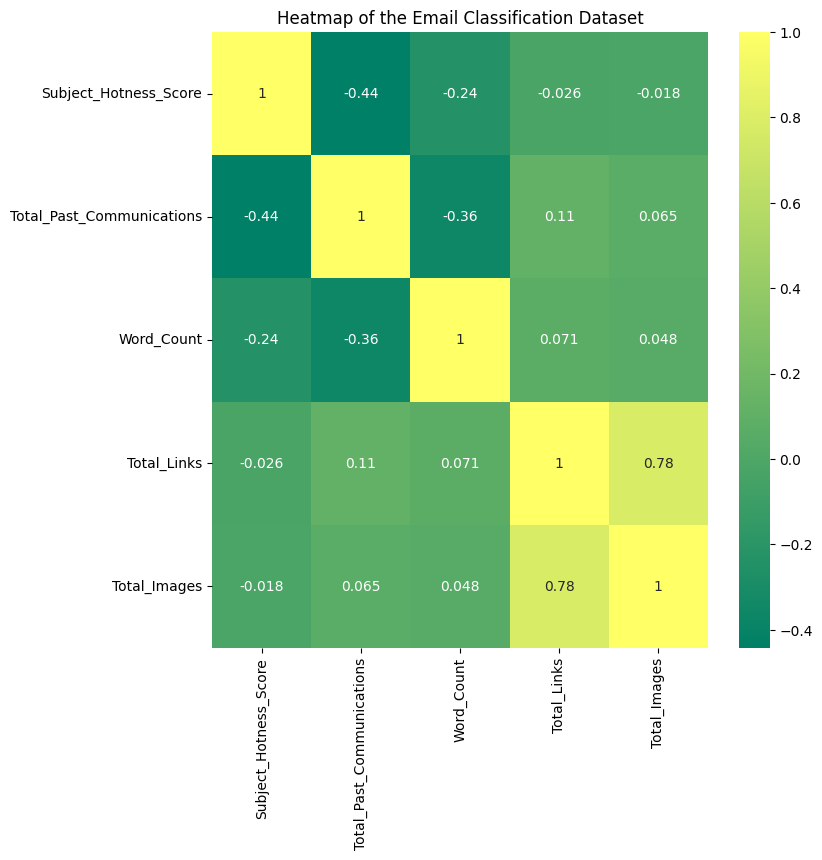

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,annot=True,cmap='summer')
plt.title("Heatmap of the Email Classification Dataset")
plt.show()

**Heat map shows that link and images are highly co related to each other**

#### Model Preparation

In [23]:
# Convert 'Email_Status' to a categorical data type before splitting
df['Email_Status'] = pd.Categorical(df['Email_Status'])

In [24]:
x = df.drop(['Email_ID','Email_Status'],axis =1)
y = df['Email_Status']

#### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2025)

#### Scalling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
#Create a dictionary to store Score
results = {}

### 1.Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

#### Predicting the Score

In [31]:
print('Training Score',lr.score(x_train,y_train))
print('Testing Score',lr.score(x_test,y_test))

Training Score 0.8056679290755724
Testing Score 0.8001549186676995


#### Evaluation Metrics

In [33]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('F1 Score : ',f1_score(y_test,y_pred,average='weighted'))
print('Classification Report: \n ',classification_report(y_test,y_pred))

results['Logistic Regression'] = accuracy_score(y_test, y_pred)

Accuracy Score :  0.8001549186676995
F1 Score :  0.7263050703288297
Classification Report: 
                precision    recall  f1-score   support

           0       0.81      0.99      0.89      9289
           1       0.46      0.05      0.09      1946
           2       0.00      0.00      0.00       384

    accuracy                           0.80     11619
   macro avg       0.42      0.35      0.33     11619
weighted avg       0.72      0.80      0.73     11619



### 2.Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred_dt = dt.predict(x_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

#### Predicting the Score

In [37]:
print("Training Score : ",dt.score(x_train,y_train))
print("Testing Score : ",dt.score(x_test,y_test))

Training Score :  0.9988810466517473
Testing Score :  0.7061709269300284


#### Evaluation Metrics

In [39]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_dt))
print('F1 Score : ',f1_score(y_test,y_pred_dt,average='weighted'))
print('Classification Report: \n ',classification_report(y_test,y_pred_dt))

results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

Accuracy Score :  0.7061709269300284
F1 Score :  0.7124247258634108
Classification Report: 
                precision    recall  f1-score   support

           0       0.84      0.82      0.83      9289
           1       0.26      0.28      0.27      1946
           2       0.08      0.11      0.09       384

    accuracy                           0.71     11619
   macro avg       0.39      0.40      0.40     11619
weighted avg       0.72      0.71      0.71     11619



### 3.Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

#### Predicting the Score

In [42]:
print("Training Score : ",rf.score(x_train,y_train))
print("Testing Score : ",rf.score(x_test,y_test))

Training Score :  0.9988380099845068
Testing Score :  0.7977450727257079


#### Evaluation Metrics

In [44]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_rf))
print('F1 Score : ',f1_score(y_test,y_pred_rf,average='weighted'))
print('Classification Report: \n ',classification_report(y_test,y_pred_rf))

results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

Accuracy Score :  0.7977450727257079
F1 Score :  0.7566767606846428
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89      9289
           1       0.44      0.19      0.26      1946
           2       0.14      0.03      0.04       384

    accuracy                           0.80     11619
   macro avg       0.47      0.39      0.40     11619
weighted avg       0.74      0.80      0.76     11619



### 4.Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVC
svm = SVC()

In [46]:
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

#### Predicting the Score

In [47]:
print("Training Score : ",svm.score(x_train,y_train))
print("Testing Score : ",svm.score(x_test,y_test))

Training Score :  0.8130056808400757
Testing Score :  0.8079008520526724


#### Evaluation Metrics

In [49]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_svm))
print('F1 Score : ',f1_score(y_test,y_pred_svm,average='weighted'))
print('Classification Report: \n ',classification_report(y_test,y_pred_svm))

results['Support Vector Machine'] = accuracy_score(y_test, y_pred_svm)

Accuracy Score :  0.8079008520526724
F1 Score :  0.7422097787763584
Classification Report: 
                precision    recall  f1-score   support

           0       0.82      0.99      0.89      9289
           1       0.56      0.10      0.16      1946
           2       0.00      0.00      0.00       384

    accuracy                           0.81     11619
   macro avg       0.46      0.36      0.35     11619
weighted avg       0.75      0.81      0.74     11619



In [50]:
print("Model Accuracy Scores:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

Model Accuracy Scores:
Logistic Regression: 0.8002
Decision Tree: 0.7062
Random Forest: 0.7977
Support Vector Machine: 0.8079


In [51]:
over_all_score = pd.DataFrame(results,index = ['Accuracy Score'])
over_all_score

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine
Accuracy Score,0.800155,0.706171,0.797745,0.807901


Based on the accuracy scores, the Support Vector Machine (SVM) model has the highest accuracy (0.8079) among the four models tested (Logistic Regression, Decision Tree, Random Forest, and SVM). This indicates that the SVM model performs the best in predicting the target variable on the given dataset compared to the other models.